In [36]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [37]:
df=pd.read_csv('dataset_augmented_all.csv')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,metal_amount_mmol,ligand_amount_mmol,reductant_amount_mmol,sol1_vol_mL,solv2_vol_mL,time_min,temp_c,7,8,9,10,11,size_nm,g_factor*10^4.1
0,0,0,0,-0.454943,-0.187770,-0.196938,-0.123491,-0.525157,0.680663,-0.997007,1.0,46.0,15.0,9.0,1.0,3.06,0.000000
1,1,1,1,-0.454943,-0.187770,-0.196938,-0.103038,-0.525157,0.680663,-0.997007,1.0,46.0,15.0,9.0,1.0,1.00,0.757989
2,2,2,2,1.601355,0.032059,0.273730,-0.174625,-0.525157,-0.593509,-0.997007,6.0,71.0,15.0,9.0,1.0,1.00,0.583069
3,3,3,3,1.768534,0.047047,0.285130,-0.031450,-0.525157,-0.593509,-0.997007,6.0,47.0,15.0,9.0,1.0,2.37,0.000000
4,4,4,4,-0.454943,-0.187770,-0.196938,-0.123491,-0.525157,0.680663,-0.997007,1.0,71.0,15.0,9.0,1.0,4.00,1.115760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,196,-0.265474,-0.452514,-0.268570,-0.604149,-0.525157,0.217328,-0.176375,6.0,35.0,15.0,9.0,1.0,50.00,2.000000
197,197,197,197,0.570420,-0.202758,0.002838,-0.174625,-0.006407,-0.535592,-0.176375,6.0,79.0,15.0,9.0,4.0,1.05,15.000000
198,198,198,198,0.570420,-0.202758,0.002838,-0.174625,-0.006407,-0.535592,-0.176375,6.0,79.0,15.0,9.0,4.0,1.30,10.000000
199,199,199,199,0.570420,-0.327661,0.002838,-0.174625,-0.006407,-0.535592,-0.176375,6.0,79.0,15.0,9.0,4.0,1.05,7.000000


In [38]:
input_col=[col for col in df.columns]
input_col.remove('Unnamed: 0')
input_col.remove('Unnamed: 0.1')
input_col.remove('Unnamed: 0.2')
input_col.remove('g_factor*10^4.1')
input_col

['metal_amount_mmol',
 'ligand_amount_mmol',
 'reductant_amount_mmol',
 'sol1_vol_mL',
 'solv2_vol_mL',
 'time_min',
 'temp_c',
 '7',
 '8',
 '9',
 '10',
 '11',
 'size_nm']

In [39]:
X = df[input_col]

Y = df['g_factor*10^4.1']

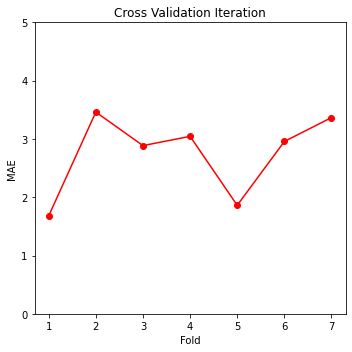

In [40]:
cv=5
fig,ax = plt.subplots(1, 1, figsize=(5,5))
n_splits=7
cv = KFold(n_splits=n_splits, random_state=45, shuffle=True)

#size
clf1=joblib.load('model_aug_size_DecisionTree.joblib')
scores_size = cross_val_score(clf1, X, Y, cv=cv, scoring='neg_mean_absolute_error')
scores_size=-scores_size
ax.set(ylim=(0,5))
ax.plot(range(1,n_splits+1),scores_size,'ro-')
ax.set_title('Cross Validation Iteration')
ax.set(xlabel='Fold', ylabel='MAE')


fig.tight_layout()